In [225]:
# Data Visualization
library(ggplot2)

# Random Forest
library(randomForest)
require(caTools)

# We change our working directory...
setwd('C:\\Users\\...\\Downloads\\students-performance-in-exams')

# We pass our data into an array...
df <- read.csv('StudentsPerformance.csv')
df <- df[c(1,2,3,4,5,7,8,6)]
data <- df

# Let's see what we have here...
head(df)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,reading.score,writing.score,math.score
female,group B,bachelor's degree,standard,none,72,74,72
female,group C,some college,standard,completed,90,88,69
female,group B,master's degree,standard,none,95,93,90
male,group A,associate's degree,free/reduced,none,57,44,47
male,group C,some college,standard,none,78,75,76
female,group B,associate's degree,standard,none,83,78,71


In [226]:
# It looks like our data does not have too mnay features...
# Also, the features all look categorical, but, currently in string form...
# We will use integers to clean our features for the algorthim.
# We get the unique values in each column for integer-based categories.
for (column in 1:5) {
    print(unique(df[,column]))
}

[1] female male  
Levels: female male
[1] group B group C group A group D group E
Levels: group A group B group C group D group E
[1] bachelor's degree  some college       master's degree    associate's degree
[5] high school        some high school  
6 Levels: associate's degree bachelor's degree high school ... some high school
[1] standard     free/reduced
Levels: free/reduced standard
[1] none      completed
Levels: completed none


In [227]:
# We clean the gender column...
clean_gender <- function(x) {
    if ( x == 'male') {
        x = 0
    }
    
    else {
        x = 1
    }
        
}
df[,1] = sapply(df[,1], clean_gender)

# We clean the race.ethnicity column...
clean_ethnicity <- function(x) {
    if ( x == 'group A') {
        x = 0
    } else if ( x == 'group B') {
        x = 1
    } else if ( x == 'group C') {
        x = 2
    } else if ( x == 'group D') {
        x = 3
    } else {
        x = 4
    }
}

df[,2] = sapply(df[,2], clean_ethnicity)

# We clean the parent.level.of.education column...
clean_education <- function(x) {
    if ( x == "bachelor's degree") {
        x = 0 
    } else if ( x == "some college") {
        x = 1
    } else if ( x == "master's degree") {
        x = 2
    } else if ( x == "associate's degree") {
        x = 3
    } else if ( x == "high school") {
        x = 4
    } else {
        x = 5
    }
}

df[,3] = sapply(df[,3], clean_education)

# We clean the lunch column...
clean_lunch <- function(x) {
    if ( x == 'standard') {
        x = 0
    } else {
        x = 1
    }
}

df[,4] = sapply(df[,4], clean_lunch)

# We clean the test.preparation.course column...
clean_prep <- function(x) {
    if ( x == 'completed') {
        x = 0
    } else {
        x = 1
    }
}

df[,5] = sapply(df[,5], clean_prep)

In [228]:
# We spot-check that the integer-based categories have successfully updated...
head(df)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,reading.score,writing.score,math.score
1,1,0,0,1,72,74,72
1,2,1,0,0,90,88,69
1,1,2,0,1,95,93,90
0,0,3,1,1,57,44,47
0,2,1,0,1,78,75,76
1,1,3,0,1,83,78,71


In [229]:
# We use a Pearson Corrlelation tets to determine if there are any correlations amongst variables...
cor(df, method = 'pearson')

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,reading.score,writing.score,math.score
gender,1.000000000,0.001501924,-0.02838346,0.02137167,0.006027952,0.2443126,0.3012249,-0.1679822
race.ethnicity,0.001501924,1.000000000,-0.08048602,-0.04656259,-0.017508038,0.1452526,0.1656905,0.2164154
parental.level.of.education,-0.028383460,-0.080486016,1.00000000,-0.01437793,-0.011557512,-0.1434293,-0.1923381,-0.1392356
lunch,0.021371670,-0.046562590,-0.01437793,1.00000000,-0.017044085,-0.2295603,-0.2457687,-0.3508766
test.preparation.course,0.006027952,-0.017508038,-0.01155751,-0.01704409,1.000000000,-0.2417804,-0.3129463,-0.1777025
reading.score,0.244312608,0.145252622,-0.14342932,-0.22956032,-0.241780434,1.0000000,0.9545981,0.8175797
writing.score,0.301224936,0.165690511,-0.19233808,-0.24576868,-0.312946284,0.9545981,1.0000000,0.8026420
math.score,-0.167982238,0.216415448,-0.13923560,-0.35087665,-0.177702469,0.8175797,0.8026420,1.0000000


In [230]:
# Well... all features seem to have a low correlation with the desired predicted variables...
# The only things worth mentioning are:
# The Reading and Writing scores show a very high positive corrleation.
# The Math score has an appreciable positive correlation to the Writing score and the Reading score.
# We view our scores...
summary(df[6:8])

 reading.score    writing.score      math.score    
 Min.   : 17.00   Min.   : 10.00   Min.   :  0.00  
 1st Qu.: 59.00   1st Qu.: 57.75   1st Qu.: 57.00  
 Median : 70.00   Median : 69.00   Median : 66.00  
 Mean   : 69.17   Mean   : 68.05   Mean   : 66.09  
 3rd Qu.: 79.00   3rd Qu.: 79.00   3rd Qu.: 77.00  
 Max.   :100.00   Max.   :100.00   Max.   :100.00  

In [324]:
# It looks like a high C is the average score for each of the three tests...
# A more in-depth analysis of data must occur, specifically, data visualization.
# I assume our data is clustered due to the categorical nature of the features.
# Meaning, plotting the data would provide rich insight for clustering.
# We move to a Machine Learning model for now.
# We split our data for training and testing...
sample <- sample.split(df, SplitRatio = .75)
train <- subset(df, sample == TRUE)
test  <- subset(df, sample == FALSE)

# We split our training data into the X and y vectors...
x_train = train[c(1,2,3,4,5,6,7)]
y_train = train[,6]

# We split our testing data into the X and y vectors...
x_test = test[c(1,2,3,4,5,6,7)]
y_test = test[,6]

# We seek to predict the Math Score of the individuals.
# We will include the Reading and Writing scores within the model as well...
# We create the model...
Predict_Math_Score <- randomForest(
    x = x_train,
    y = y_train,
    importance = TRUE,
)
Predict_Math_Score


Call:
 randomForest(x = x_train, y = y_train, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 4.381626
                    % Var explained: 97.94

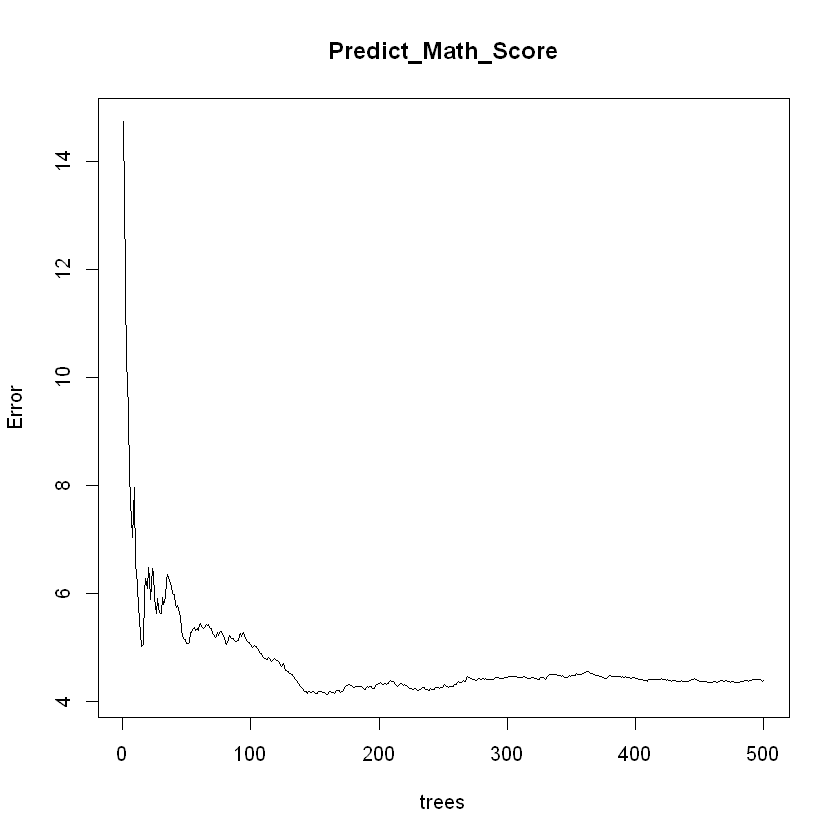

In [325]:
# While the % Var Explained will need to be determined for Overfitting, we have a model!
plot(Predict_Math_Score)

In [326]:
# As the figure displays, as we add more Trees to the model, the lower our error seems to appear.
# We now predict our test set and determine the RMSE for the predictions.
mean(sqrt((y_test - predict(Predict_Math_Score, x_test))**2))

[1] 1.231515

In [327]:
# On average, it looks like our predicted Math test score deviated by 1.53 points from the actual Math test score.
importance(Predict_Math_Score)

,%IncMSE,IncNodePurity
gender,8.6884428,3230.151
race.ethnicity,-0.2884227,1834.442
parental.level.of.education,2.2739181,2534.039
lunch,8.0446732,2789.480
test.preparation.course,7.4280766,1908.863
reading.score,44.9236804,81048.227
writing.score,31.2192291,58733.207


In [332]:
# It also appears that the reading.score and the writing.score had the highest importance in predicting the
# math.score. This aligns with our Correlation test!
# Let's drop the columns and teach a new Random Forest algorithm. 
# This time, we drop the Reading and Writing test scores in case if the Math test is taken before the Reading
# and writing tests...
# We split our data for training and testing...
sample <- sample.split(df, SplitRatio = .75)
train <- subset(df[c(1,2,3,4,5,8)], sample == TRUE)
test  <- subset(df[c(1,2,3,4,5,8)], sample == FALSE)

# We split our training data into the X and y vectors...
x_train = train[c(1,2,3,4,5)]
y_train = train[,6]

# We split our testing data into the X and y vectors...
x_test = test[c(1,2,3,4,5)]
y_test = test[,6]

# We create the model without the Reading and Writing scores...
Math_Score_No_Tests.rf <- randomForest(
    x = x_train,
    y = y_train,
    importance = TRUE,
)
Math_Score_No_Tests.rf


Call:
 randomForest(x = x_train, y = y_train, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 185.8035
                    % Var explained: 19.63

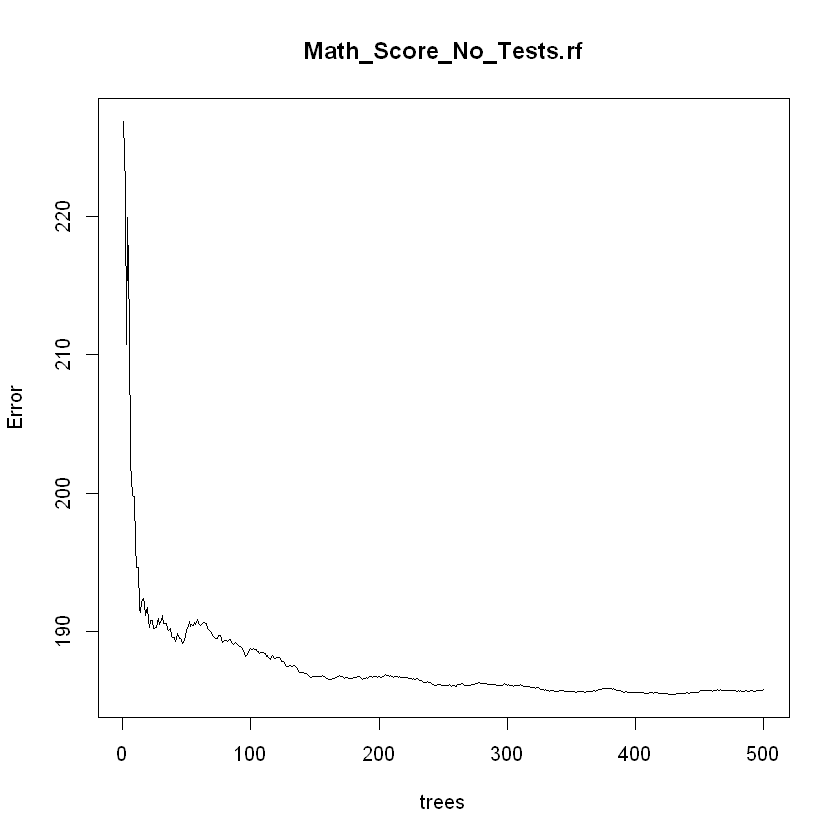

In [333]:
# Yikes... the % Var. explained is alarmingly low... especially when compared to the previous model.
# let's see how well the tree number influences the error.
plot(Math_Score_No_Tests.rf)

In [334]:
# It appears our tree value is optimized to minimize the error...
# Let us calculate the actual RMSE for a prediction on the test set.
mean(sqrt((y_test - predict(Math_Score_No_Tests.rf, x_test))**2))

[1] 11.25267

In [335]:
# Surprisingly, the type of lunch had the largest influence on the predictions of our test set...
importance(Math_Score_No_Tests.rf)

,%IncMSE,IncNodePurity
gender,16.05360,3838.737
race.ethnicity,16.31127,5923.159
parental.level.of.education,14.49475,5417.350
lunch,33.85978,13303.236
test.preparation.course,22.53119,4932.731


In [292]:
# It appears dropping the Reading and Writing score significantly affected the results of this model...
# Recommendations: Optimize the current model and visualize the data more appropriately.
# It may be more worthwhile to compare which variables most influence the Reading Score and the Writing Score as well.
# Then, feature importance can be cross-validated between this model and the Reading and Writing score models...
# It may be beneficial to use the score values to predict the parent's level of education in the future...

### To Do:
Data Visualization <br>
Display Tree Paths <br>